<a href="https://colab.research.google.com/github/grinaldo-oliveira/SibGrapi/blob/main/Comparando_T%C3%A9cnicas_com_Clusters_e_R%C3%B3tulos_Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/Doutorado/SibGrapi

/content/drive/MyDrive/Doutorado/SibGrapi


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_embbed(pickle_path: str) -> tuple:
    data = np.load(pickle_path, allow_pickle=True).tolist()
    file_refs = data['fnames']
    embeds    = data['embeddings']
    labels    = data['labels']
    classes   = data['classes']

    embeds = np.vstack(embeds)
    labels = np.vstack(labels)

    return file_refs, embeds, labels, classes

def plot_embed2d(data, labels):
    fig = plt.figure(constrained_layout=True)  # Apply constrained_layout to the figure
    ax = fig.add_subplot(111)  # Remove layout argument
    ax.scatter(data[:,0], data[:,1], c=labels)
    plt.show()

def plot_embed3d(data, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
    plt.show()

In [17]:
def load_embbed(pickle_path: str) -> tuple:
    data = np.load(pickle_path, allow_pickle=True).tolist()
    file_refs = data['fnames']
    embeds    = data['embeddings']
    labels    = data['labels']
    classes   = data['classes']

    embeds = np.vstack(embeds)
    labels = np.hstack(labels)  # Changed line

    return file_refs, embeds, labels, classes

In [24]:
file_refs, embeddings, labels, classes = load_embbed("Data/terumo-data-jpeg/UNI.npy")
embeddings.shape, labels.shape

((7582, 1024), (7582,))

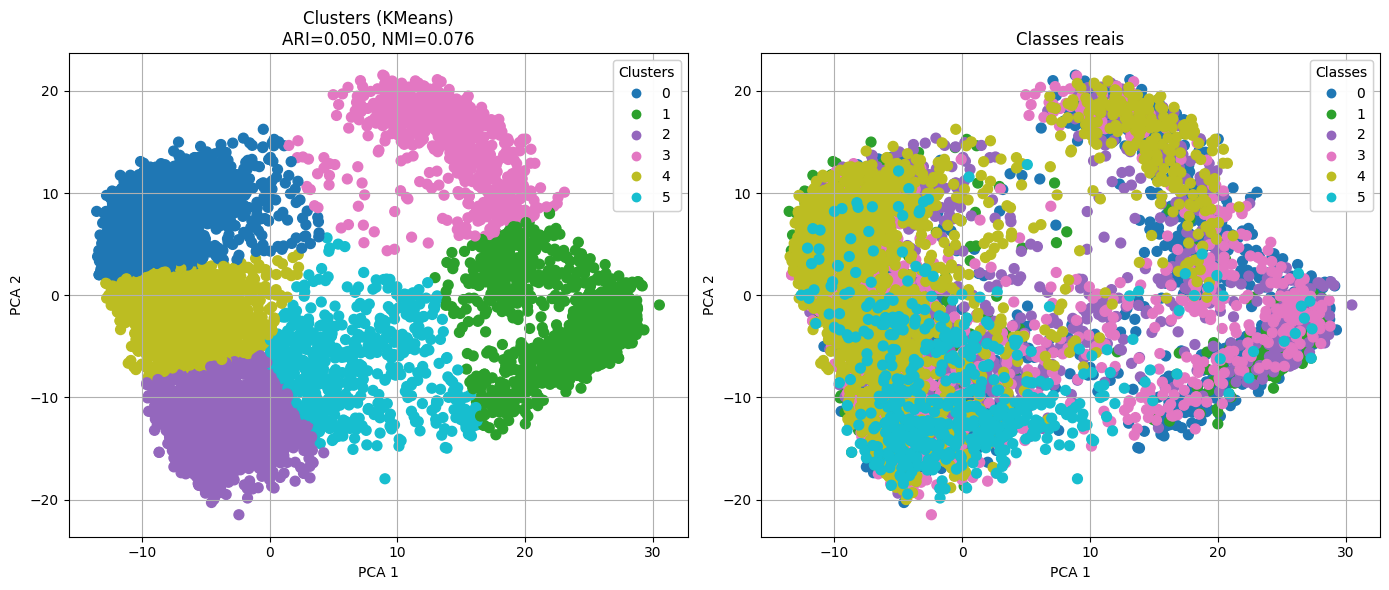

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# embeddings: matriz (n_amostras, n_dimensoes)
# labels: vetor (n_amostras,) com os rótulos reais (0 a 5, por exemplo)

# Reduz para 2D com PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Clustering com KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings_pca)

# Métricas de avaliação
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

# Plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Cluster Plot
scatter1 = axs[0].scatter(embeddings_pca[:, 0], embeddings_pca[:, 1],
                          c=clusters, cmap='tab10', s=50)
axs[0].set_title(f'Clusters (KMeans)\nARI={ari:.3f}, NMI={nmi:.3f}')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
legend1 = axs[0].legend(*scatter1.legend_elements(), title="Clusters")
axs[0].add_artist(legend1)
axs[0].grid(True)

# Label Plot
scatter2 = axs[1].scatter(embeddings_pca[:, 0], embeddings_pca[:, 1],
                          c=labels, cmap='tab10', s=50)
axs[1].set_title('Classes reais')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')
legend2 = axs[1].legend(*scatter2.legend_elements(), title="Classes")
axs[1].add_artist(legend2)
axs[1].grid(True)

plt.tight_layout()
plt.show()

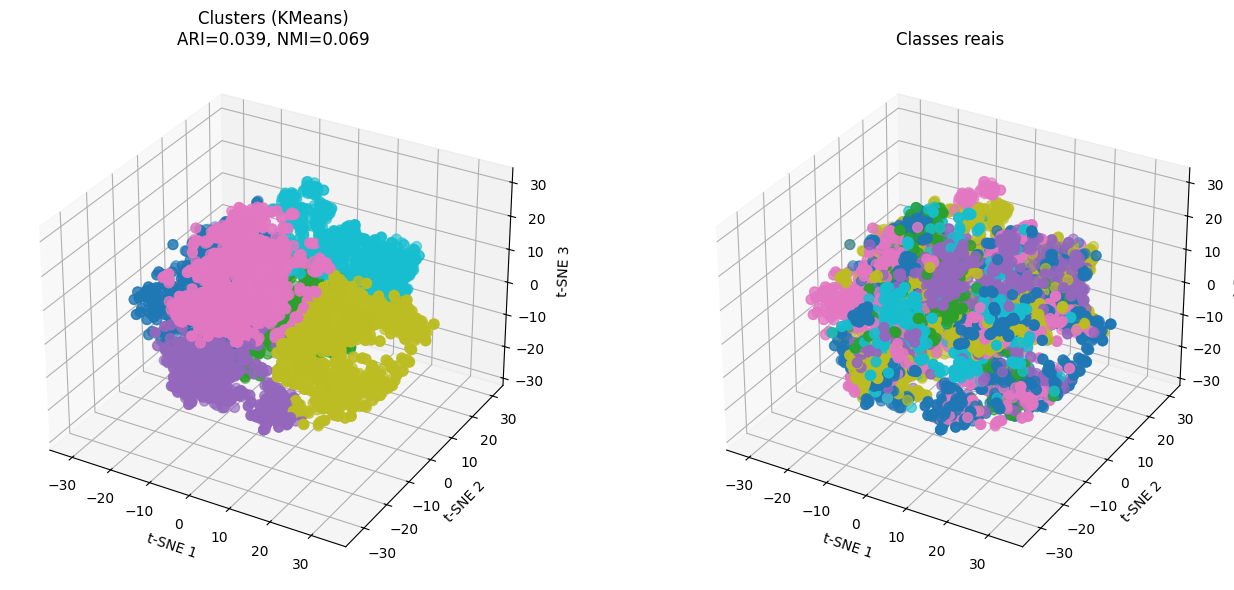

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # necessário para 3D

# embeddings: matriz (n_amostras, n_dimensoes)
# labels: vetor (n_amostras,) com os rótulos reais

# Reduz para 3D com t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings)

# Clustering com KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings_tsne)

# Métricas de avaliação
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

# Plot em 3D
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Clusters encontrados
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], embeddings_tsne[:, 2],
                       c=clusters, cmap='tab10', s=50)
ax1.set_title(f'Clusters (KMeans)\nARI={ari:.3f}, NMI={nmi:.3f}')
ax1.set_xlabel('t-SNE 1')
ax1.set_ylabel('t-SNE 2')
ax1.set_zlabel('t-SNE 3')

# Gráfico 2: Rótulos reais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], embeddings_tsne[:, 2],
                       c=labels, cmap='tab10', s=50)
ax2.set_title('Classes reais')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_zlabel('t-SNE 3')

plt.tight_layout()
plt.show()

In [28]:
pip install umap-learn


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


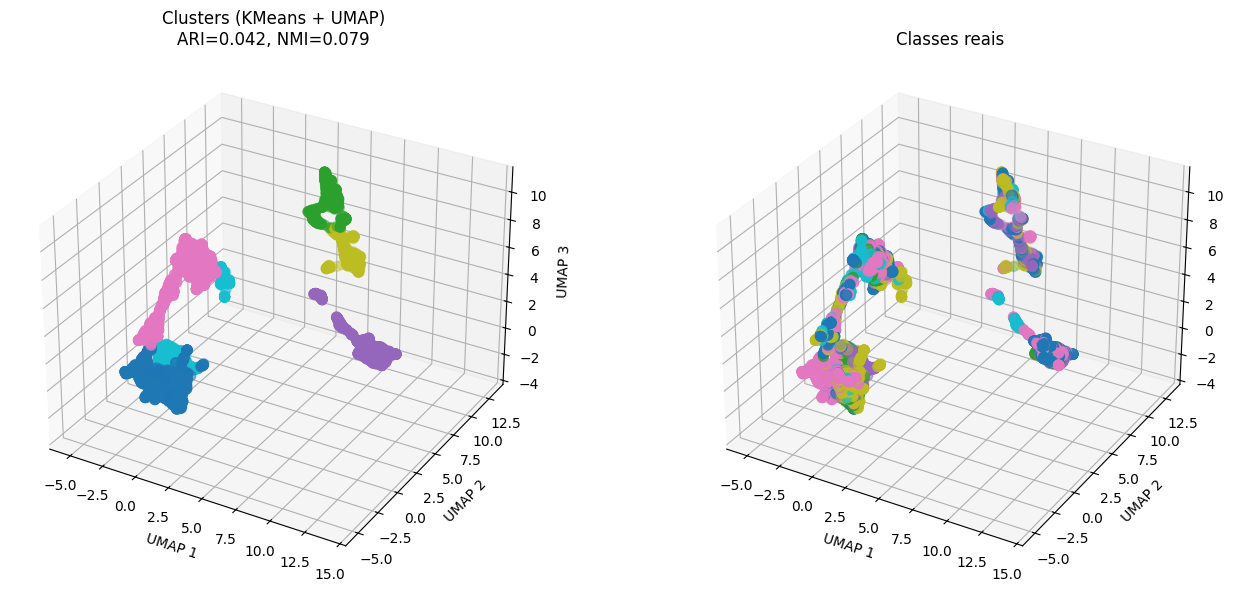

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D  # necessário para plot 3D

# embeddings: matriz (n_amostras, n_dimensoes)
# labels: vetor (n_amostras,) com os rótulos reais

# Redução com UMAP para 3D
reducer = umap.UMAP(n_components=3, random_state=42)
embeddings_umap = reducer.fit_transform(embeddings)

# Clustering com KMeans nos dados reduzidos
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)

# Métricas de comparação
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

# Visualização 3D
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Clusters encontrados
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], embeddings_umap[:, 2],
                       c=clusters, cmap='tab10', s=50)
ax1.set_title(f'Clusters (KMeans + UMAP)\nARI={ari:.3f}, NMI={nmi:.3f}')
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')
ax1.set_zlabel('UMAP 3')

# Gráfico 2: Rótulos reais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], embeddings_umap[:, 2],
                       c=labels, cmap='tab10', s=50)
ax2.set_title('Classes reais')
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_zlabel('UMAP 3')

plt.tight_layout()
plt.show()
